# sklearn库示例

Scikit-learn是针对Python编程语言的免费软件机器学习库。 直接查看[官网](https://scikit-learn.org/stable/)可以清楚地看到其主要功能的展示。它具有各种分类，回归和聚类算法，包括支持向量机，随机森林，梯度提升，k均值和DBSCAN，并且旨在与Python数值和科学库NumPy和SciPy互操作。安装方式如下：

```Shell
conda install -c conda-forge scikit-learn
```

首先简单看一张机器学习的图:

![machine-learning](MachineLearningAlgorithms.png)

可以看到很多很多的算法可以使用，sklearn包括其中的一部分。

从实践的角度出发，机器学习要做的工作就是在一个数据集上建立一个或者多个模型，然后对模型进行优化和评估。在sklearn中各个模块到底是什么可以参考这个图：

![](918791-20160810230724965-1004907740.png)

另外，根据官网的介绍，sklearn主要涉及以下几个方面的内容：

- classification 分类
- regression 回归
- clustering 聚类
- dimensionality reduction 降维
- model selection 模型选择
- preprocessing 前处理

算法很多，实际中一般的做法是**API里面找到你要调用的方法，然后可以查看方法参数的情况和使用情况**。也可以在指南里面找到具体的解释。

本文将根据实际使用情况，不定期记录一些常用机器学习方法的实例，关于这些用到的机器学习算法的基本原理，个人记录到[elks repo](https://github.com/OuyangWenyu/elks/tree/master/math-basics/machine-learning)中了。

## Classification

分类是识别一个对象时属于什么类型。应用场景包括垃圾邮件检测，图像识别等。常见的算法包括：SVM，nearest neigbors，random forest等。个人用到分类相对较少，后续用到再做补充。

## Clustering

聚类时自动地对一组对象进行分组。常见应用有顾客行为分析，试验结果分组等。算法包括k-means,spectral clustering, mean-shift等。

先看看最常用的k-means算法的实例。首先，同所有机器学习的过程一样，就是导入数据。先看看kmeans算法的参数要求，因为sklearn库中都是直接调用fit函数来执行算法的，所以直接看fit函数的参数即可：[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

从官方API文档，可以看出X 的shape是 shape=(n_samples, n_features)， y是不需要的，这里只是为了保证API的一致性，所以保留了。接下来看例子。

In [2]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 1, 0, 0, 2])

In [3]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0])

In [4]:
kmeans.cluster_centers_

array([[10.,  3.],
       [ 1.,  2.],
       [10.,  0.]])

接下来是一个稍微正式点的例子。

In [5]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
X[:5,:]

Automatically created module for IPython interactive environment


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
y = iris.target
y[:5]

array([0, 0, 0, 0, 0])

然后，定义KMeans算法分类器。执行时调用fit函数即可。最后结果可以从fit后的estimator中通过labels_直接取出。

C:\Users\hust2\AppData\Local\Temp/ipykernel_4168/3043359413.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\hust2\AppData\Local\Temp/ipykernel_4168/3043359413.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=labels.astype(np.float), edgecolor='k')
C:\Users\hust2\AppData\Local\Tem

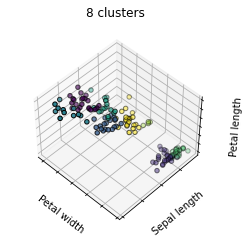

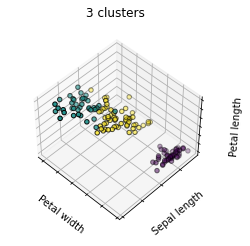

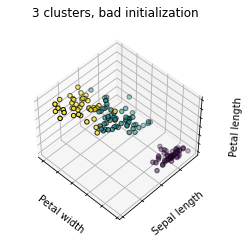

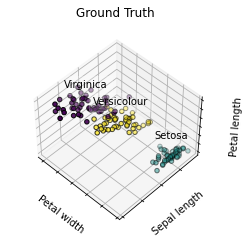

In [7]:
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

## Dimensionality reduction

降维是为了减少变量的数量来把握事物的主要矛盾。常用的算法比如PCA等。

## Model selection

比较，验证和选择模型及其参数是机器学习中非常重要的内容，旨在通过调参来提升模型的性能，常见的算法有 grid search, cross validation, metrics等。

### 交叉验证

交叉验证是评估一个estimator性能的经典方法。

学习预测函数的参数并在相同的数据上对其进行测试在方法上是错误的。一个仅重复其刚刚看到的样本标签的模型将获得完美的评分，但无法预测看不见的数据任何有用的信息，这种情况称为过拟合。

为了避免这种情况，在执行（监督）机器学习实验时，通常会将部分可用数据作为测试集 进行保留。请注意，“实验”一词并非仅表示学术用途，因为即使在商业环境中，机器学习通常也是从实验开始的。以下是模型训练中典型的交叉验证工作流程的流程图。另外，最佳参数可以通过网格搜索等技术确定。

![](grid_search_workflow.png)

在scikit-learn中，可以使用 train_test_split 函数快速将数据集随机分为训练集和测试集。下面给出一个例子：

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [9]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

现在，我们可以快速采样训练集，同时保留40％的数据用于测试（评估）分类器：

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

((90, 4), (90,))

In [11]:
X_train[0]

array([6. , 3.4, 4.5, 1.6])

可以看到X已经被随机拆分了。

In [12]:
X_test.shape, y_test.shape

((60, 4), (60,))

In [13]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

在评估estimatior的“超参数”不同设置时，仍然存在测试集过拟合的风险， 因为可以对参数进行调整，直到估算器达到最佳性能为止。这样，有关测试集的知识可以“渗入”模型，并且评估指标不再能报告泛化性能。为了解决此问题，可以将数据集的另一部分保留为所谓的“验证集”：对训练集进行训练，然后对验证集进行评估，并判断实验何时成功，这样最后再对测试集进行最终评估。

但是，通过将可用数据划分为三个集合，会大大减少了可用于学习模型的样本数量，并且结果可能取决于一对（训练，验证）集合的特定随机选择。

解决此问题的方法称为 交叉验证 （CV），如下图所示。仍应保留测试集以进行最终评估，但是进行CV时不再需要验证集。在称为k-fold CV 的基本方法中，将训练集分为k个较小的集，k-fold 中的每一个都遵循以下过程：

- 使用  k-1 组 作为训练数据；
- 模型在数据的其余部分上得到验证。

通过k-fold交叉验证报告的性能指标是**循环中计算值的平均值**。这种方法在计算上可能会很昂贵，但不会浪费太多数据（固定任意验证集时就是这种情况），这在诸如样本数量非常少的逆推断之类的问题中是一个主要优势。

![](grid_search_cross_validation.png)

最简单地使用交叉验证的方式是调用 cross_val_score 函数。

In [14]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [15]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


从上例可以看出，cv就是k-flod交叉验证的k。当cv是整数的时候就是这个意思，不过当它是none时，也就是取默认的cnv值，它还可以是，接下来看看。

#### 交叉验证iterators

sklearn中有用于生成索引的程序，这些索引可用于根据不同的交叉验证策略进行数据集拆分。

比如交叉验证迭代器：假设某些数据是独立且相同地分布的（i.i.d），则假定所有样本都来自同一生成过程，并且假定该生成过程没有对过去生成的样本的记忆。

在这种情况下，可以使用以下交叉验证器。

注意,尽管iid数据是机器学习理论中的常见假设，但在实践中却很少见。如果知道样品是使用与时间有关的过程生成的，则**使用具有时间序列意识的交叉验证方案会更安全**。 类似地，如果我们知道生成过程具有组结构（从不同受试者收集的样品， 测量设备等）更安全地是使用**逐组交叉验证**。

先看看K-Fold，KFold 将所有样本均分为 k 样本组，称为folds折痕（如果 k=n ，这等效于“留一法”策略）。预测功能是使用 k-1个折叠，剩下的折叠用于测试。

在具有4个样本的数据集上进行2倍交叉验证的示例：

In [16]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


如果数量不能被kfold次数整除会怎么样，下面看下

In [17]:
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1 3] [2]
[0 1 2] [3]


如果想要打乱顺序，可以使用shuffle，如果想要每次结果能复现，可以设置random_state:

In [18]:
X = np.arange(59)
kf = KFold(n_splits=3,shuffle=True,random_state=1)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 0  1  4  5  6  7  8  9 11 12 13 14 15 16 17 18 20 22 23 25 27 28 29 31
 32 33 37 41 42 43 45 46 48 50 53 54 56 57 58] [ 2  3 10 19 21 24 26 30 34 35 36 38 39 40 44 47 49 51 52 55]
[ 0  1  2  3  5  6  7  8  9 10 11 12 15 16 18 19 20 21 24 25 26 30 34 35
 36 37 38 39 40 43 44 45 47 49 51 52 55 56 58] [ 4 13 14 17 22 23 27 28 29 31 32 33 41 42 46 48 50 53 54 57]
[ 2  3  4 10 13 14 17 19 21 22 23 24 26 27 28 29 30 31 32 33 34 35 36 38
 39 40 41 42 44 46 47 48 49 50 51 52 53 54 55 57] [ 0  1  5  6  7  8  9 11 12 15 16 18 20 25 37 43 45 56 58]


如果样本数量较少，少于交叉验证次数，那么会报错的：

In [19]:
X = np.arange(2)
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

ValueError: Cannot have number of splits n_splits=3 greater than the number of samples: n_samples=2.

以下是一个图示：

![](sphx_glr_plot_cv_indices_0041.png)

再看看 Repeated K-Fold

RepeatedKFold重复K折n次。当需要运行KFold n次，每次重复产生不同的分割时，可以使用它。

重复2次的2倍K折示例：

In [21]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


再看随机排列交叉验证，又名随机和拆分 ShuffleSplit

ShuffleSplit迭代器将产生一个用户定义的独立训练/测试数据集分割的编号。首先对样本进行混洗，然后将其分为一对训练和测试集。

通过显式植入random_state伪随机数生成器，可以控制结果可重复性的随机性。

这是一个用法示例：

In [22]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


对于分类问题，通常会看到 Stratified k-fold：

StratifiedKFold是kfolds的变体，它返回分层的folds：每个集合所包含的每个目标类别的样本所占百分比与在完整集合所占的百分比大致相同。

这是一个数据集的分层三折交叉验证示例，该数据集包含来自两个不平衡类的50个样本。我们显示每个类别中的样本数量，并与进行比较 KFold。

In [23]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))



kf = KFold(n_splits=3)
for train, test in kf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))

train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]
train -  [28  5]   |   test -  [17]
train -  [28  5]   |   test -  [17]
train -  [34]   |   test -  [11  5]


## Preprocessing

归一化等数据前处理也是机器学习的重要内容。比如将文本输入数据转换为机器学习算法所需的输入形式。下面看看在sklearn中如何处理数据。

首先是sklearn地pipelines。

### Pipelines

通常构建一个复杂的模型需要联合数据变换，分类器等内容，这时候最常用的工具就是 Pipeline 了。Pipeline可以用来串联多个estimators为1个。这在复杂的序列处理过程中尤其有用，比如特征选择-正则化-分类。接下来就直接看例子。

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])

上例就是将一个PCA降维和一个SVC分类器链接起来了。还可以使用make_pipeline 函数简单构建pipelines

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
make_pipeline(Binarizer(), MultinomialNB())

Pipeline(steps=[('binarizer', Binarizer()), ('multinomialnb', MultinomialNB())])

pipeline中的estimators 是以list的形式存储在steps属性中的，可以通过索引访问：

In [26]:
pipe.steps[0]

('reduce_dim', PCA())

### Scaler

在数据预处理中，有一个比较重要的环节就是归一化，归一化通常能帮助数据更公平地对待所有样本，来提供机器学习模型地泛化能力。最简单的是StandardScaler

针对每一个特征维度用均值和方差归一化。

In [27]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [28]:
np.random.seed(123)
print('use sklearn')
# 注：shape of data: [n_samples, n_features]
data = np.random.randn(10, 4)
scaler = StandardScaler()
scaler.fit(data)
print('scaler info:\n scaler.mean_: {},\n scaler.var_: {}'.format(scaler.mean_, scaler.var_))

use sklearn
scaler info:
 scaler.mean_: [ 0.08737571  0.33094968 -0.24989369 -0.50195303],
 scaler.var_: [1.54038781 1.29032409 1.04082479 1.16464894]


In [29]:
trans_data = scaler.transform(data)
print('original data: ')
print(data)
print('transformed data: ')
print (trans_data)

original data: 
[[-1.0856306   0.99734545  0.2829785  -1.50629471]
 [-0.57860025  1.65143654 -2.42667924 -0.42891263]
 [ 1.26593626 -0.8667404  -0.67888615 -0.09470897]
 [ 1.49138963 -0.638902   -0.44398196 -0.43435128]
 [ 2.20593008  2.18678609  1.0040539   0.3861864 ]
 [ 0.73736858  1.49073203 -0.93583387  1.17582904]
 [-1.25388067 -0.6377515   0.9071052  -1.4286807 ]
 [-0.14006872 -0.8617549  -0.25561937 -2.79858911]
 [-1.7715331  -0.69987723  0.92746243 -0.17363568]
 [ 0.00284592  0.68822271 -0.87953634  0.28362732]]
transformed data: 
[[-0.94511643  0.58665507  0.5223171  -0.93064483]
 [-0.53659117  1.16247784 -2.13366794  0.06768082]
 [ 0.9495916  -1.05437488 -0.42049501  0.3773612 ]
 [ 1.13124423 -0.85379954 -0.19024378  0.06264126]
 [ 1.70696485  1.63376764  1.22910949  0.8229693 ]
 [ 0.52371324  1.02100318 -0.67235312  1.55466934]
 [-1.08067913 -0.85278672  1.13408114 -0.858726  ]
 [-0.18325687 -1.04998594 -0.00561227 -2.1281129 ]
 [-1.49776284 -0.9074785   1.15403514  0.30422

可以看到，scaler是对每列数据分别归一化的。通过numpy可进一步验证：

In [30]:
print('use numpy by self')
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
var = std * std
print('mean: {}, std: {}, var: {}'.format(mean, std, var))
# numpy 的广播功能
another_trans_data = data - mean
# 注：是除以标准差
another_trans_data = another_trans_data / std
print('another_trans_data: ')
print (another_trans_data)

use numpy by self
mean: [ 0.08737571  0.33094968 -0.24989369 -0.50195303], std: [1.24112361 1.13592433 1.02020821 1.07918902], var: [1.54038781 1.29032409 1.04082479 1.16464894]
another_trans_data: 
[[-0.94511643  0.58665507  0.5223171  -0.93064483]
 [-0.53659117  1.16247784 -2.13366794  0.06768082]
 [ 0.9495916  -1.05437488 -0.42049501  0.3773612 ]
 [ 1.13124423 -0.85379954 -0.19024378  0.06264126]
 [ 1.70696485  1.63376764  1.22910949  0.8229693 ]
 [ 0.52371324  1.02100318 -0.67235312  1.55466934]
 [-1.08067913 -0.85278672  1.13408114 -0.858726  ]
 [-0.18325687 -1.04998594 -0.00561227 -2.1281129 ]
 [-1.49776284 -0.9074785   1.15403514  0.30422599]
 [-0.06810748  0.31452186 -0.61717074  0.72793583]]


有时候数据是多维的，比如包括时间维度，为了较好地利用这些code，需要调整到二维，对于时间不等长的情况，需要想办法先计算统计值，然后再逐个归一化。

In [31]:
import numpy as np
from sklearn.preprocessing import StandardScaler

np.random.seed(123)
# 注：shape of data: [n_samples, n_time_steps, n_features]
data = np.random.randn(3, 5, 4)
data

array([[[-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471],
        [-0.57860025,  1.65143654, -2.42667924, -0.42891263],
        [ 1.26593626, -0.8667404 , -0.67888615, -0.09470897],
        [ 1.49138963, -0.638902  , -0.44398196, -0.43435128],
        [ 2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ]],

       [[ 0.73736858,  1.49073203, -0.93583387,  1.17582904],
        [-1.25388067, -0.6377515 ,  0.9071052 , -1.4286807 ],
        [-0.14006872, -0.8617549 , -0.25561937, -2.79858911],
        [-1.7715331 , -0.69987723,  0.92746243, -0.17363568],
        [ 0.00284592,  0.68822271, -0.87953634,  0.28362732]],

       [[-0.80536652, -1.72766949, -0.39089979,  0.57380586],
        [ 0.33858905, -0.01183049,  2.39236527,  0.41291216],
        [ 0.97873601,  2.23814334, -1.29408532, -1.03878821],
        [ 1.74371223, -0.79806274,  0.02968323,  1.06931597],
        [ 0.89070639,  1.75488618,  1.49564414,  1.06939267]]])

In [32]:
scaler = StandardScaler()
num_instances, num_time_steps, num_features = data.shape
data = data.reshape(-1, num_features)
data

array([[-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654, -2.42667924, -0.42891263],
       [ 1.26593626, -0.8667404 , -0.67888615, -0.09470897],
       [ 1.49138963, -0.638902  , -0.44398196, -0.43435128],
       [ 2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ],
       [ 0.73736858,  1.49073203, -0.93583387,  1.17582904],
       [-1.25388067, -0.6377515 ,  0.9071052 , -1.4286807 ],
       [-0.14006872, -0.8617549 , -0.25561937, -2.79858911],
       [-1.7715331 , -0.69987723,  0.92746243, -0.17363568],
       [ 0.00284592,  0.68822271, -0.87953634,  0.28362732],
       [-0.80536652, -1.72766949, -0.39089979,  0.57380586],
       [ 0.33858905, -0.01183049,  2.39236527,  0.41291216],
       [ 0.97873601,  2.23814334, -1.29408532, -1.03878821],
       [ 1.74371223, -0.79806274,  0.02968323,  1.06931597],
       [ 0.89070639,  1.75488618,  1.49564414,  1.06939267]])

In [33]:
data = scaler.fit_transform(data)
data

array([[-1.1735231 ,  0.53515821,  0.25527739, -1.21497847],
       [-0.73395865,  1.05016761, -2.04486214, -0.21633077],
       [ 0.86514223, -0.93256052, -0.56121795,  0.0934495 ],
       [ 1.06059658, -0.7531682 , -0.36181549, -0.22137196],
       [ 1.68005966,  1.47168391,  0.86737463,  0.53920135],
       [ 0.40690623,  0.92363426, -0.77933243,  1.27113742],
       [-1.31938566, -0.75226234,  0.78507806, -1.14303643],
       [-0.3537785 , -0.9286351 , -0.20192067, -2.41283281],
       [-1.76815882, -0.80117806,  0.80235864,  0.0202907 ],
       [-0.22988021,  0.29176532, -0.73154331,  0.44413722],
       [-0.9305512 , -1.61042724, -0.31675578,  0.7131097 ],
       [ 0.06118865, -0.25943311,  2.04586658,  0.56397401],
       [ 0.6161571 ,  1.51212088, -1.08344033, -0.78163704],
       [ 1.27934491, -0.87848603,  0.04026335,  1.17240825],
       [ 0.53984078,  1.13162039,  1.28466945,  1.17247934]])

然后需要再转回来恢复原来的维度：

In [34]:
val_data = data.reshape(num_instances, num_time_steps, num_features)
val_data

array([[[-1.1735231 ,  0.53515821,  0.25527739, -1.21497847],
        [-0.73395865,  1.05016761, -2.04486214, -0.21633077],
        [ 0.86514223, -0.93256052, -0.56121795,  0.0934495 ],
        [ 1.06059658, -0.7531682 , -0.36181549, -0.22137196],
        [ 1.68005966,  1.47168391,  0.86737463,  0.53920135]],

       [[ 0.40690623,  0.92363426, -0.77933243,  1.27113742],
        [-1.31938566, -0.75226234,  0.78507806, -1.14303643],
        [-0.3537785 , -0.9286351 , -0.20192067, -2.41283281],
        [-1.76815882, -0.80117806,  0.80235864,  0.0202907 ],
        [-0.22988021,  0.29176532, -0.73154331,  0.44413722]],

       [[-0.9305512 , -1.61042724, -0.31675578,  0.7131097 ],
        [ 0.06118865, -0.25943311,  2.04586658,  0.56397401],
        [ 0.6161571 ,  1.51212088, -1.08344033, -0.78163704],
        [ 1.27934491, -0.87848603,  0.04026335,  1.17240825],
        [ 0.53984078,  1.13162039,  1.28466945,  1.17247934]]])

另外，train和valid/test阶段的scaler使用，略有不同，通常情况下，为了不将信息泄露到test阶段，test阶段会使用train阶段fit好的统计值。如下所示

In [35]:
import numpy as np
from sklearn.preprocessing import StandardScaler
np.random.seed(123)
# 注：shape of data: [n_samples, n_features]
X_train = np.random.randn(10, 4)
X_test = np.random.randn(8, 4)
X_train

array([[-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654, -2.42667924, -0.42891263],
       [ 1.26593626, -0.8667404 , -0.67888615, -0.09470897],
       [ 1.49138963, -0.638902  , -0.44398196, -0.43435128],
       [ 2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ],
       [ 0.73736858,  1.49073203, -0.93583387,  1.17582904],
       [-1.25388067, -0.6377515 ,  0.9071052 , -1.4286807 ],
       [-0.14006872, -0.8617549 , -0.25561937, -2.79858911],
       [-1.7715331 , -0.69987723,  0.92746243, -0.17363568],
       [ 0.00284592,  0.68822271, -0.87953634,  0.28362732]])

In [36]:
X_test

array([[-0.80536652, -1.72766949, -0.39089979,  0.57380586],
       [ 0.33858905, -0.01183049,  2.39236527,  0.41291216],
       [ 0.97873601,  2.23814334, -1.29408532, -1.03878821],
       [ 1.74371223, -0.79806274,  0.02968323,  1.06931597],
       [ 0.89070639,  1.75488618,  1.49564414,  1.06939267],
       [-0.77270871,  0.79486267,  0.31427199, -1.32626546],
       [ 1.41729905,  0.80723653,  0.04549008, -0.23309206],
       [-1.19830114,  0.19952407,  0.46843912, -0.83115498]])

In [37]:
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)

In [38]:
X_train_std

array([[-0.94511643,  0.58665507,  0.5223171 , -0.93064483],
       [-0.53659117,  1.16247784, -2.13366794,  0.06768082],
       [ 0.9495916 , -1.05437488, -0.42049501,  0.3773612 ],
       [ 1.13124423, -0.85379954, -0.19024378,  0.06264126],
       [ 1.70696485,  1.63376764,  1.22910949,  0.8229693 ],
       [ 0.52371324,  1.02100318, -0.67235312,  1.55466934],
       [-1.08067913, -0.85278672,  1.13408114, -0.858726  ],
       [-0.18325687, -1.04998594, -0.00561227, -2.1281129 ],
       [-1.49776284, -0.9074785 ,  1.15403514,  0.30422599],
       [-0.06810748,  0.31452186, -0.61717074,  0.72793583]])

In [39]:
X_test_std = sc.transform(X_test)
X_test_std

array([[-0.71930163, -1.81228548, -0.13821306,  0.99682157],
       [ 0.20240799, -0.30176321,  2.58992129,  0.84773397],
       [ 0.71818817,  1.67897949, -1.02350836, -0.49744314],
       [ 1.33454597, -0.99391516,  0.27403908,  1.45597201],
       [ 0.64726082,  1.25354873,  1.71096234,  1.45604308],
       [-0.69298853,  0.40840131,  0.55299073, -0.76382581],
       [ 1.07154785,  0.41929453,  0.28953283,  0.24913242],
       [-1.03589751, -0.11569926,  0.70410413, -0.30504568]])

当需要变回到原来的数据时，执行inverse_transform函数即可。

In [40]:
x_test_back = sc.inverse_transform(X_test_std)
x_test_back == X_test

array([[ True, False,  True,  True],
       [ True, False,  True, False],
       [ True,  True,  True,  True],
       [ True,  True, False,  True],
       [ True,  True,  True,  True],
       [ True,  True, False,  True],
       [ True,  True, False, False],
       [False,  True,  True,  True]])

计算稍微有一点点误差，所以不能保证数据完全一样，但是在一个小误差范围内是相等的。

In [41]:
np.allclose(x_test_back, X_test)

True

对于分类变量，需要另外处理，参考：[Encoding categorical features](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)，sklearn中使用OrdinalEncoder，将每个categorical feature转换为整数 (0 to n_categories - 1):

In [42]:
from sklearn import preprocessing
import numpy as np

enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

可以看到，默认地，分类变量也是每列分别处理计算的，每列变量的顺序是按照字母顺序排列的。

另外，有时候会将一个已存在地python函数放入到transformer中帮助实现数据处理。这时候可以使用 FunctionTransformer

In [43]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])